#### Notes on current version:
**To Try**:
- Cayley parameterization](https://planetmath.org/cayleysparameterizationoforthogonalmatrices) of $SU_d$ (since this is really all we need)...*will it be more stable than Lie's parameterization?* Note: it is a homeomorphism so this is great for UAP!
- SVD approach to pre-trainining 
  - (here for procrustes problem)[https://en.wikipedia.org/wiki/Orthogonal_Procrustes_problem]
  - [here for complexity](https://mathoverflow.net/questions/161252/what-is-the-time-complexity-of-truncated-svd)
  
- Get the base version working:

- Add the tall version...

# NEU (Reconfigurations Map and Related Functions)

### Basic Algorithm (NEU-OLS)

1. Perform Basic Algorithm (in this case OLS)
2. Map predictions to their graph; ie $x\mapsto (x,\hat{f}_{OLS}(x))$ where $\hat{f}_{OLS}$ is the least-squares regression function.

## Initializations:

In [1]:
# Deep Learning & ML
import tensorflow as tf
import tensorflow_probability as tfp
import keras as K
import keras.backend as Kb
from keras.layers import *

from keras.models import Model
from keras.models import Sequential
from keras import layers
from keras import utils as np_utils
from scipy import linalg as scila

from tensorflow.keras.initializers import RandomUniform
from tensorflow.keras.constraints import NonNeg



# Linear Regression
from sklearn.linear_model import LinearRegression

# General
import numpy as np
import time

# Alerts
import os as beepsnd

# Others
import math

# Visualization
from matplotlib.pyplot import figure

# General Outputs
print('TensorFlow:', tf.__version__)

Using TensorFlow backend.


TensorFlow: 2.1.0


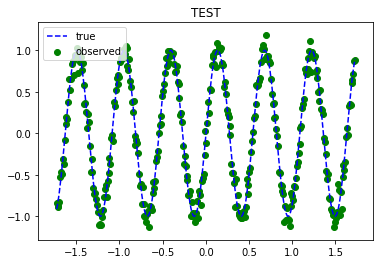

In [2]:
N_Reconfigurations = 20
d = 1 # Dimension of X
D = 1 # Dimension of Y


# Data Meta-Parameters
noise_level = 0.1
uncertainty_level= 0.5

# Training meta-parameters
Pre_Epochs = 5
Full_Epochs = 10

# Depth & Height of first Reconfiguration
Initial_Depth = 1
Initial_Height = 5
# Depth & Height Per Reconfiguration
Depth_per_reconfig = 1
Height_per_reconfig = 5

# Number of Datapoints
N_data = 10**2
# Unknown Function
def unknown_f(x):
    return np.sin(2*x) #+ (x % 2)

# Generate Data
%run Data_Generator.ipynb

# Import Custom Layer(s)
%run Special_Layers_Homeomorphic.ipynb

#### Prepare data for NEU

In [3]:
# Reshape Data Into Compatible Shape
data_x = np.array(data_x).reshape(-1,d)
data_y = np.array(data_y)
# Perform OLS Regression
linear_model = LinearRegression()
reg = linear_model.fit(data_x, data_y)
model_pred_y = linear_model.predict(data_x)
# Map to Graph
data_NEU = np.concatenate((data_x,model_pred_y.reshape(-1,D)),1)
NEU_targets_full  = np.concatenate((data_x,data_y.reshape(-1,D)),1)
NEU_targets  = data_y.reshape(-1,D)

# Train NEU-OLS
- Get Base Model,
- Greedy Layer-Wise Initialization,
- SGD on entire structure.

In [9]:
# Base Model
model = get_base_model(data_NEU,NEU_targets,10,Initial_Depth,Initial_Height)

In [10]:
# Greedy Initialization
NEU_OLS_Greedy_init = model
for i in range(N_Reconfigurations):
    # Update User on Status of Initialization
    print(((i+1)/N_Reconfigurations))
    
    # Update Model
    NEU_OLS_Greedy_init_temp = add_reconfiguration_unit_greedily(NEU_OLS_Greedy_init,
                                                                 data_NEU,
                                                                 NEU_targets_full,
                                                                 Pre_Epochs,
                                                                 Depth_per_reconfig,
                                                                 Height_per_reconfig)
    
    # Check for Blowup
    if math.isnan(np.mean(NEU_OLS_Greedy_init.predict(data_NEU))):
        NEU_OLS_Greedy_init = NEU_OLS_Greedy_init
        break
    else: #Update Model if not explosion
        NEU_OLS_Greedy_init = NEU_OLS_Greedy_init_temp
    
    print(np.mean(np.abs((NEU_OLS_Greedy_init.predict(data_NEU) - NEU_targets_full)**2)))
    

0.05
0.2934500646710641
0.1
0.7413014488397165
0.15
0.334364923514777
0.2
0.8645800339450507
0.25
0.3433401456513445
0.3
0.7359134563676969
0.35
0.4221397008235196
0.4
1.0400767681442165
0.45
0.4072563937809867
0.5
0.6315608408499613
0.55
0.5709638102633982
0.6
0.48315414200026824
0.65
0.6940410469753043
0.7
0.6871432729235868
0.75
0.6336375558590484
0.8
1.712389535710347
0.85
2.008962471988971
0.9
0.5389008409164936
0.95
0.5443662663361066
1.0
0.5279430436201472


Next we train NEU-OLS, by unfreezing the greedily initialized layers and using SGD on the whole structure.

In [ ]:
NEU_OLS = build_reconfiguration(model_greedy_initialized=NEU_OLS_Greedy_init, 
                                trainx = data_NEU, 
                                trainy = NEU_targets, 
                                Full_Epochs_in = Full_Epochs, 
                                height = Height_per_reconfig)

Train on 334 samples
Epoch 1/10


In [ ]:
Deep_GLd = get_base_model_deep_GLd(data_NEU,
                                   NEU_targets,
                                   Full_Epochs_in = Full_Epochs, 
                                   depth = (N_Reconfigurations*Initial_Depth))

## Make Predictions

In [ ]:
# # Predictions (for comparison: TEMP)
NEU_OLS_single_unit_prediction = model.predict(data_NEU)
NEU_OLS_greedy_initializations = NEU_OLS_Greedy_init.predict(data_NEU)
NEU_OLS_prediction = NEU_OLS.predict(data_NEU)
Deep_GLd_prediction = Deep_GLd.predict(data_NEU)

# Visualize Predictions

In [ ]:
# Initialization
visualization_grid = np.random.uniform(-10,10,[1000,2])
figure(num=None, figsize=(12, 12), dpi=80, facecolor='w', edgecolor='k')

# Plot Data
plt.scatter(visualization_grid[:,0],visualization_grid[:,1],color='red',marker = '.')
# Transform Data
NEU_OLS_prediction_visualization_init = model.predict(visualization_grid)
NEU_OLS_prediction_visualization_Greedy = NEU_OLS_Greedy_init.predict(visualization_grid)
NEU_OLS_prediction_visualization = NEU_OLS.predict(visualization_grid)
Deep_GLd_prediction_visualization = Deep_GLd.predict(visualization_grid)

# Plot Transformed Data
plt.scatter(NEU_OLS_prediction_visualization_init[:,0],NEU_OLS_prediction_visualization_init[:,1],color='b',label='Init',marker = '.')
plt.scatter(NEU_OLS_prediction_visualization_Greedy[:,0],NEU_OLS_prediction_visualization_Greedy[:,1],color='g',label='NEU_Greedy',marker = '.')
plt.scatter(NEU_OLS_prediction_visualization[:,0],NEU_OLS_prediction_visualization[:,1],color='purple',label='NEU',marker = '.')
plt.scatter(Deep_GLd_prediction_visualization[:,0],Deep_GLd_prediction_visualization[:,1],color='black',label='NEU',marker = '.')

Detailed Visualization... evolution of NEU through training

In [ ]:
# Adjust Figure Details
plt.figure(num=None, figsize=(12, 10), dpi=80, facecolor='w', edgecolor='k')

# Data Plot
plt.plot(data_x,data_y,color='k',label='true',linestyle='--')

# Plot Models
plt.plot(data_x,model_pred_y,color='r',label='OLS')
plt.plot(data_x,NEU_OLS_single_unit_prediction[:,1],color='b',label='NEU_Unit')
plt.plot(data_x,NEU_OLS_greedy_initializations[:,1],color='g',label='NEU_Greedy_Init')
plt.plot(data_x,NEU_OLS_prediction[:,1],color='purple',label='NEU-OLS')
plt.plot(data_x,Deep_GLd_prediction[:,1],color='black',label='Deep_GLd')

Succinct graph (results only)

In [ ]:
# Adjust Figure Details
plt.figure(num=None, figsize=(12, 10), dpi=80, facecolor='w', edgecolor='k')

# Data Plot
plt.plot(data_x,true_y,color='k',label='true',linestyle='--')

# Plot Models
plt.plot(data_x,model_pred_y,color='r',label='OLS')
plt.plot(data_x,NEU_OLS_prediction[:,1],color='purple',label='NEU-OLS')
plt.plot(data_x,Deep_GLd_prediction[:,1],color='black',label='Deep_GLd')

 ---

#### The END